In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, ClassicalRegister, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi 
from qiskit.extensions import UnitaryGate
from qiskit.extensions import HamiltonianGate
from qiskit.circuit.library import PhaseEstimation
from qiskit.algorithms import HamiltonianPhaseEstimation
 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = provider.get_backend('ibm_oslo')

# import basic plot tools
from qiskit.visualization import plot_histogram

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
H =    [[0.00125682, 0.01001185, 0.00127092, 0.01446157, 0.00813463,
        0.00122314, 0.00139337, 0.0011896 ],
       [0.01001185, 0.00253032, 0.0011896 , 0.00813463, 0.01446157,
        0.00139337, 0.00122314, 0.00127092],
       [0.00127092, 0.0011896 , 0.01527694, 0.00139337, 0.00099804,
        0.00813463, 0.01446157, 0.00351768],
       [0.01446157, 0.00813463, 0.00139337, 0.00351369, 0.00351768,
        0.0011896 , 0.00127092, 0.00099804],
       [0.00813463, 0.01446157, 0.00099804, 0.00351768, 0.00238915,
        0.00127092, 0.0011896 , 0.00139337],
       [0.00122314, 0.00139337, 0.00813463, 0.0011896 , 0.00127092,
        0.02770102, 0.01001185, 0.01446157],
       [0.00139337, 0.00122314, 0.01446157, 0.00127092, 0.0011896 ,
        0.01001185, 0.01976376, 0.00813463],
       [0.0011896 , 0.00127092, 0.00351768, 0.00099804, 0.00139337,
        0.01446157, 0.00813463, 0.01310652]]

In [3]:
U = HamiltonianGate(H,2*np.pi,label="CU")
print(U)

Instruction(name='hamiltonian', num_qubits=3, num_clbits=0, params=[array([[0.00125682+0.j, 0.01001185+0.j, 0.00127092+0.j, 0.01446157+0.j,
        0.00813463+0.j, 0.00122314+0.j, 0.00139337+0.j, 0.0011896 +0.j],
       [0.01001185+0.j, 0.00253032+0.j, 0.0011896 +0.j, 0.00813463+0.j,
        0.01446157+0.j, 0.00139337+0.j, 0.00122314+0.j, 0.00127092+0.j],
       [0.00127092+0.j, 0.0011896 +0.j, 0.01527694+0.j, 0.00139337+0.j,
        0.00099804+0.j, 0.00813463+0.j, 0.01446157+0.j, 0.00351768+0.j],
       [0.01446157+0.j, 0.00813463+0.j, 0.00139337+0.j, 0.00351369+0.j,
        0.00351768+0.j, 0.0011896 +0.j, 0.00127092+0.j, 0.00099804+0.j],
       [0.00813463+0.j, 0.01446157+0.j, 0.00099804+0.j, 0.00351768+0.j,
        0.00238915+0.j, 0.00127092+0.j, 0.0011896 +0.j, 0.00139337+0.j],
       [0.00122314+0.j, 0.00139337+0.j, 0.00813463+0.j, 0.0011896 +0.j,
        0.00127092+0.j, 0.02770102+0.j, 0.01001185+0.j, 0.01446157+0.j],
       [0.00139337+0.j, 0.00122314+0.j, 0.01446157+0.j, 0.0012

In [4]:
#HamiltonianPhaseEstimation(U)

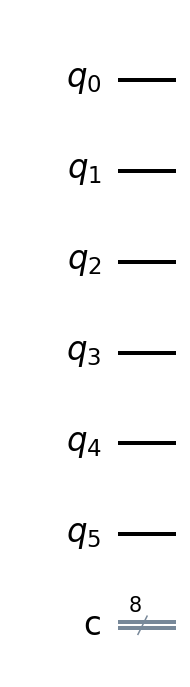

In [5]:
qpe = QuantumCircuit(6, 8)
qpe.draw(scale=2)

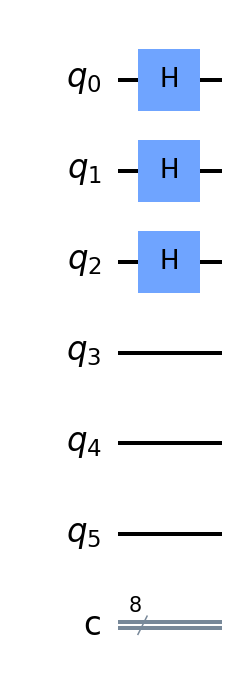

In [6]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw(scale=2)

In [7]:
#PhaseEstimation(3,U)

In [8]:
CU = U.control(label="control")
print(CU)

Instruction(name='chamiltonian', num_qubits=4, num_clbits=0, params=[array([[0.00125682+0.j, 0.01001185+0.j, 0.00127092+0.j, 0.01446157+0.j,
        0.00813463+0.j, 0.00122314+0.j, 0.00139337+0.j, 0.0011896 +0.j],
       [0.01001185+0.j, 0.00253032+0.j, 0.0011896 +0.j, 0.00813463+0.j,
        0.01446157+0.j, 0.00139337+0.j, 0.00122314+0.j, 0.00127092+0.j],
       [0.00127092+0.j, 0.0011896 +0.j, 0.01527694+0.j, 0.00139337+0.j,
        0.00099804+0.j, 0.00813463+0.j, 0.01446157+0.j, 0.00351768+0.j],
       [0.01446157+0.j, 0.00813463+0.j, 0.00139337+0.j, 0.00351369+0.j,
        0.00351768+0.j, 0.0011896 +0.j, 0.00127092+0.j, 0.00099804+0.j],
       [0.00813463+0.j, 0.01446157+0.j, 0.00099804+0.j, 0.00351768+0.j,
        0.00238915+0.j, 0.00127092+0.j, 0.0011896 +0.j, 0.00139337+0.j],
       [0.00122314+0.j, 0.00139337+0.j, 0.00813463+0.j, 0.0011896 +0.j,
        0.00127092+0.j, 0.02770102+0.j, 0.01001185+0.j, 0.01446157+0.j],
       [0.00139337+0.j, 0.00122314+0.j, 0.01446157+0.j, 0.001

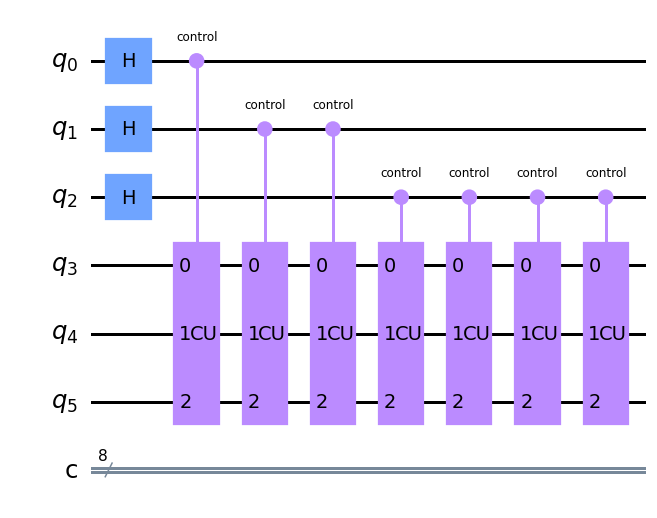

In [9]:
repetitions = 1
#CU = U#.to_gate().control(1)
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(CU,[counting_qubit,3,4,5])
        #qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
qpe.draw(scale=1.5)

In [10]:
#straight from the tutorial:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [11]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

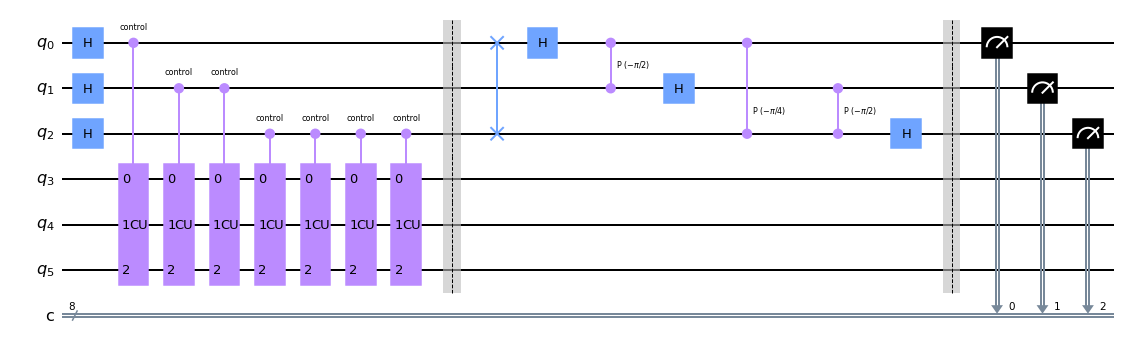

In [12]:
qpe.draw()

/tmp/ipykernel_117/1941479506.py:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  results = backend.run(qobj).result()


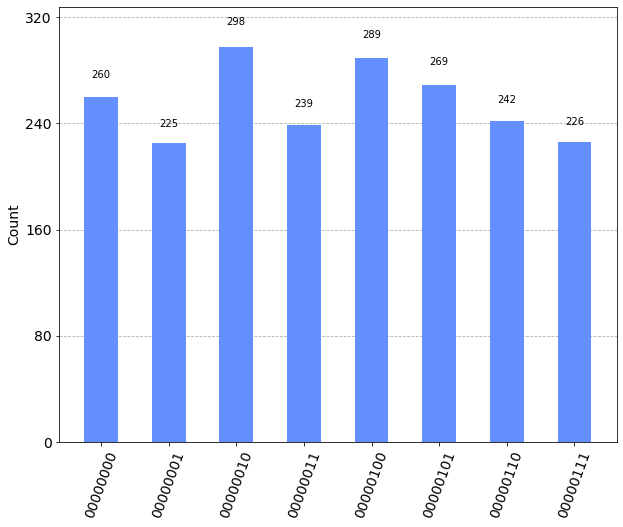

In [13]:
# aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, backend)
qobj = assemble(t_qpe, shots=shots)
results = backend.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer,figsize=(10,8))